In [40]:
import os
from conllu import parse
import matplotlib.pyplot as plt

In [41]:
file_list = os.listdir(os.getcwd())
conllu_files = []
for file in file_list:
    if file.endswith('conllu'):
        conllu_files.append(file)

conllu_files


['he_htb-ud-dev.conllu',
 'bn_bru-ud-test.conllu',
 'it_postwita-ud-dev.conllu',
 'ko_gsd-ud-dev.conllu',
 'bho_bhtb-ud-test.conllu',
 'xcl_caval-ud-test.conllu',
 'bej_nsc-ud-test.conllu',
 'fr_partut-ud-dev.conllu',
 'bor_bdt-ud-test.conllu',
 'bg_btb-ud-dev.conllu',
 'br_keb-ud-test.conllu']

In [42]:
lang = []
for file in conllu_files:
    lang.append(file.split('_')[0])


In [43]:
file_dict = {}
for la in range(len(lang)):
    file_dict[lang[la]] = conllu_files[la]

file_dict



{'he': 'he_htb-ud-dev.conllu',
 'bn': 'bn_bru-ud-test.conllu',
 'it': 'it_postwita-ud-dev.conllu',
 'ko': 'ko_gsd-ud-dev.conllu',
 'bho': 'bho_bhtb-ud-test.conllu',
 'xcl': 'xcl_caval-ud-test.conllu',
 'bej': 'bej_nsc-ud-test.conllu',
 'fr': 'fr_partut-ud-dev.conllu',
 'bor': 'bor_bdt-ud-test.conllu',
 'bg': 'bg_btb-ud-dev.conllu',
 'br': 'br_keb-ud-test.conllu'}

In [44]:
fil = open(conllu_files[0],"r",encoding = "utf-8")
data = fil.read()
parse(data)

[TokenList<עשרות, אנשים, מגיעים, מתאילנד, מ, תאילנד, לישראל, ל, ישראל, כשהם, כש, הם, נרשמים, כמתנדבים, כ, מתנדבים, ,, אך, למעשה, משמשים, עובדים, שכירים, זולים, ., metadata={sent_id: "1", text: "עשרות אנשים מגיעים מתאילנד לישראל כשהם נרשמים כמתנדבים, אך למעשה משמשים עובדים שכירים זולים."}>, TokenList<תופעה, זו, התבררה, אתמול, בוועדת, ב, וועדת, העבודה, ה, עבודה, והרווחה, ו, ה, רווחה, של, הכנסת, ה, כנסת, ,, שדנה, ש, דנה, בנושא, ב, נושא, העסקת, עובדים, זרים, ., metadata={sent_id: "2", text: "תופעה זו התבררה אתמול בוועדת העבודה והרווחה של הכנסת, שדנה בנושא העסקת עובדים זרים."}>, TokenList<יו"ר, הוועדה, ה, וועדה, ,, ח"כ, אורה, נמיר, (, מערך, ), ,, טענה, כי, ", מביאים, עובדים, זרים, לישראל, ל, ישראל, על, תקן, של, מתנדבים, מתאילנד, מ, תאילנד, ,, רק, כדי, לא, לשלם, להם, ל_, _הם, שכר, מינימום, ., metadata={sent_id: "3", text: "יו"ר הוועדה, ח"כ אורה נמיר (מערך), טענה כי "מביאים עובדים זרים לישראל על תקן של מתנדבים מתאילנד, רק כדי לא לשלם להם שכר מינימום."}>, TokenList<מצד, מ, צד, אחד, רוצה, האוצר

In [45]:
token = parse(data)[0][5]

In [46]:
token

{'id': 5,
 'form': 'תאילנד',
 'lemma': 'תאילנד',
 'upos': 'PROPN',
 'xpos': 'PROPN',
 'feats': None,
 'head': 3,
 'deprel': 'obl',
 'deps': None,
 'misc': None}

In [47]:
for file in file_dict.keys():
    verb = 0
    obj = 0
    meta = open(file_dict[file],"r",encoding="utf-8")
    # print(file_dict[file])
    for tokenlist in parse(meta.read()):
        for token in tokenlist:
            if token["deprel"] == "obj":
                obj+=1
            elif token["deprel"] == "root" and token["upos"] == "VERB":
                verb+=1
    total = obj+verb
    file_dict[file] = {}
    file_dict[file]['obj_percen'] = obj/total
    file_dict[file]['verb_percen'] = verb/total
    




In [38]:
file_dict

{'he': {'obj_percen': 0.4534351145038168, 'verb_percen': 0.5465648854961832},
 'bn': {'obj_percen': 0.4142857142857143, 'verb_percen': 0.5857142857142857},
 'it': {'obj_percen': 0.5692488262910798, 'verb_percen': 0.4307511737089202},
 'ko': {'obj_percen': 0.5294117647058824, 'verb_percen': 0.47058823529411764},
 'bho': {'obj_percen': 0.29397590361445786, 'verb_percen': 0.7060240963855422},
 'xcl': {'obj_percen': 0.5673469387755102, 'verb_percen': 0.4326530612244898},
 'bej': {'obj_percen': 0.5706214689265536, 'verb_percen': 0.4293785310734463},
 'fr': {'obj_percen': 0.5034013605442177, 'verb_percen': 0.4965986394557823},
 'bor': {'obj_percen': 0.2669683257918552, 'verb_percen': 0.7330316742081447},
 'bg': {'obj_percen': 0.42236842105263156, 'verb_percen': 0.5776315789473684},
 'br': {'obj_percen': 0.37947725072604066, 'verb_percen': 0.6205227492739593}}

In [52]:
labels = list(file_dict.keys())
x = [file_dict[obj]['obj_percen'] for obj in file_dict]
y = [file_dict[obj]['verb_percen'] for obj in file_dict]

In [58]:
label_dict = {}
i = 0
for key,val in file_dict.items():
    label_dict[i] = key
    i+=1
label_dict

{0: 'he',
 1: 'bn',
 2: 'it',
 3: 'ko',
 4: 'bho',
 5: 'xcl',
 6: 'bej',
 7: 'fr',
 8: 'bor',
 9: 'bg',
 10: 'br'}

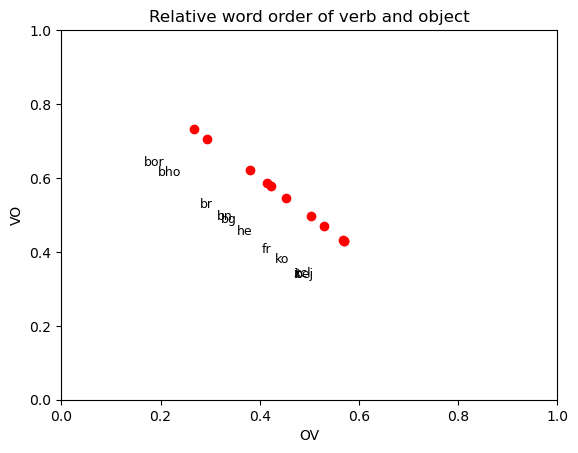

In [67]:
import sys
plt.plot(x, y, 'ro')
plt.title('Relative word order of verb and object')
plt.xlim([0,1]) # Set the x and y axis ranges
plt.ylim([0,1])
plt.xlabel('OV') # Set the x and y axis labels
plt.ylabel('VO')
for i in label_dict:  # Add labels to each of the points
    plt.text(x[i]-0.1, y[i]-0.1, label_dict[i], fontsize=9)
plt.show()